# Data exploration
Before starting manipulating the data, it is important to gain a good knowledge about them and their domain.

### Dataset attributes overview

| #  | C/N |Attribute | Customer description | Additional info |
| ---|-----|----------| ---------------------| ------------------------------------|
| 1  | C | StoreID | Store ID | |
| 2  | C | Date | Observation Date | |
| 3  | C | IsHoliday | Regional Holiday | |
| 4  | C | IsOpen | Store Open | |
| 5  | C | HasPromotions | The Store is currently running promotions | |
| 6  | C | StoreType | Type of Store (Standard Market, Super Market, Hyper Market, Shopping Centre)| |
| 7  | C | AssortmentType | Type of Products (General, With Fish Department, With Non-Food Department) | |
| 8  | N | NearestCompetitor | Distance (meters) to the nearest competitor store | |
| 9  | N | NumberOfCustomers | Number of Customer | |
| 10 | N | NumberOfSales | Number of Products Sold (Target Value) | |
| 11 | N | Region_AreaKM2 | Region Size in which the Store is located (Km2) | |
| 12 | N | Region | Region ID | |
| 13 | N | Region_GDP | Region Gross Domestic Product | |
| 14 | N | Region_PopulationK | Region Population Size (k) | |
| 15 | N | CloudCover | Level of Covering (0-9) | |
| 16 | C | Events | Meteorological event | |
| ---|---|--------------------------------| ----------------------------------------------------------| ------------------------------------|
| 17 | N | Max_Dew_PointC | Max Dew Point (Celsius) | |
| 18 | N  | Max_Gust_SpeedKm_h | Max Gust Speed (Km/h) | - A **lot of missing values** 113074 / 523021 |
| 19 | N | Max_Humidity | Max Humidity | |
| 20 | N | Max_Sea_Level_PressurehPa | Max Pressure (hPa) | |
| 21 | N | Max_TemperatureC | Max Temperature (Celsius) | |
| 22 | N | Max_VisibilityKm | Max Visibility (Km) | |
| 23 | N | Max_Wind_SpeedKm_h | Max Wind Speed (Km/h) | |
| ---|---|--------------------------------| ----------------------------------------------------------| ------------------------------------|
| 24 | N | Mean_Dew_PointC | Mean Dew Point (Celsius) | |
| 25 | N | Mean_Humidity | Mean Humidity | |
| 26 | N | Mean_Sea_Level_PressurehPa | Mean Pressure (hPa) | |
| 27 | N | Mean_TemperatureC | Mean Temperature (Celsius) | |
| 28 | N | Mean_VisibilityKm | Mean Visibility (Km) | |
| 29 | N | Mean_Wind_SpeedKm_h | Mean Window Speed (Km/h) | |
| ---|---|--------------------------------| ----------------------------------------------------------| ------------------------------------|
| 30 | N | Min_Dew_PointC | Min Dew Point (Celsius) | |
| 31 | N | Min_Humidity | Min Humidity | |
| 32 | N | Min_Sea_Level_PressurehPa | Min Pressure (hPa) | |
| 33 | N | Min_TemperatureC | Min Temperature (Celsius) | |
| 34 | N | Min_VisibilitykM | Min Visibility (Km) | |
| ---|---|--------------------------------| ----------------------------------------------------------| ------------------------------------|
| 35 | N | Precipitationmm | Precipitation Amount (mm) | |
| 36 | N | WindDirDegrees | Window Direction (degrees) | |

- Categorical: 8
- Numerical: 28


Attributes for which there exist __max, mean and min__ values:

- Dew point (Celsius)
- Humidity
- Sea level pressure (hPa)
- Temperature (Celsius)
- Visibility (Km)


With respect to the mean values:

- in addition for the max there's also: __Gust speed__
- lacking from the min: __Wind Speed__

List of features whose meaning might not be clear at a first glance:

- __Region_GDP__ : Gross Domestic Product is an indicator of economic development and prosperity. (Prodotto Interno Lordo in Italian)


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})  

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [24]:
dataset = pd.read_csv('./dataset/train.csv')
dataset.head()

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,495,...,1,11.0,16,-2,70,1029,1,6.0,0.0,23
1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,608,...,3,13.0,10,-2,58,1025,1,10.0,0.0,56
2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,665,...,3,11.0,10,-3,55,1023,2,8.0,0.0,22
3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,630,...,3,15.0,10,-6,25,1022,-1,10.0,0.0,108
4,1000,06/03/2016,0,0,0,Hyper Market,General,326,7,0,...,1,12.0,5,-6,48,1022,-5,5.0,0.0,46


In [25]:
print("(rows, columns)")
dataset.shape

(rows, columns)


(523021, 36)

### Summary stats for **categorical variables**

In [26]:
categorical=['StoreID', 'Date','IsHoliday', 'IsOpen', 'HasPromotions' , 'StoreType' ,'AssortmentType', 'Region', 'CloudCover','Events']
dataset_cat=dataset[categorical]
dataset_cat.astype('object').describe()

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,Region,CloudCover,Events
count,523021,523021,523021,523021,523021,523021,523021,523021,481840.0,398923
unique,749,729,2,2,2,4,3,11,9.0,21
top,1748,07/06/2017,0,1,0,Hyper Market,General,9,6.0,Rain
freq,729,749,507478,433958,322551,292769,296188,123201,151029.0,204733


### Summary stats for **numerical variables**

In [27]:
numerical= ['NearestCompetitor' ,'NumberOfCustomers','NumberOfSales','Region_AreaKM2','Region_GDP','Region_PopulationK','Max_Dew_PointC','Max_Gust_SpeedKm_h','Max_Humidity','Max_Sea_Level_PressurehPa','Max_TemperatureC','Max_VisibilityKm','Max_Wind_SpeedKm_h','Mean_Dew_PointC','Mean_Humidity','Mean_Sea_Level_PressurehPa','Mean_TemperatureC','Mean_VisibilityKm','Mean_Wind_SpeedKm_h','Min_Dew_PointC','Min_Humidity','Min_Sea_Level_PressurehPa','Min_TemperatureC','Min_VisibilitykM','Precipitationmm','WindDirDegrees']
dataset_num=dataset[numerical]
dataset_num.describe()

,NearestCompetitor,NumberOfCustomers,NumberOfSales,Region_AreaKM2,Region_GDP,Region_PopulationK,Max_Dew_PointC,Max_Gust_SpeedKm_h,Max_Humidity,Max_Sea_Level_PressurehPa,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
count,523021.00000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,113074.000000,523021.000000,523021.000000,...,523021.000000,511683.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,511683.000000,523021.000000,523021.000000
mean,8002.71122,259.325073,4057.377536,12381.265718,14050.547848,3861.519300,8.512014,47.980782,93.523316,1018.133184,...,10.273205,12.151025,11.724961,3.737584,51.375624,1012.078435,6.202315,7.223408,0.808278,170.458096
std,11537.70753,185.857102,2729.630381,9140.692427,2755.425404,2816.719484,5.988302,12.771727,7.617389,7.985673,...,7.041167,4.978385,5.791031,5.909098,19.284023,8.699236,6.312993,4.899575,2.631428,101.728193
min,47.00000,0.000000,0.000000,344.000000,9893.000000,816.000000,-14.000000,21.000000,44.000000,976.000000,...,-13.000000,0.000000,2.000000,-18.000000,10.000000,970.000000,-15.000000,0.000000,0.000000,-1.000000
25%,1057.00000,166.000000,2573.000000,7215.000000,11849.000000,1293.000000,4.000000,39.000000,90.000000,1013.000000,...,4.000000,10.000000,8.000000,-1.000000,36.000000,1007.000000,1.000000,3.000000,0.000000,75.000000
50%,3321.00000,251.000000,4020.000000,9643.000000,15017.000000,2770.000000,9.000000,47.000000,94.000000,1018.000000,...,11.000000,11.000000,11.000000,4.000000,51.000000,1013.000000,7.000000,8.000000,0.000000,191.000000
75%,9673.00000,345.000000,5538.000000,15566.000000,15931.000000,5727.000000,13.000000,55.000000,100.000000,1023.000000,...,16.000000,14.000000,14.000000,8.000000,66.000000,1018.000000,11.000000,10.000000,0.250000,250.000000
max,85070.00000,2206.000000,26641.000000,32221.000000,23931.000000,8146.000000,23.000000,106.000000,100.000000,1043.000000,...,30.000000,31.000000,53.000000,18.000000,100.000000,1038.000000,24.000000,31.000000,58.930000,360.000000


### OHE is needed for events, AssortmentType and StoreType
Cannot compute correlation otherwise

## Pearson's correlation coefficient

We can start to identify the most important dependences between pairs of features, in particular, what we are interested in is the correlation or anticorrelation that the target NumberOfSales has with the other features.

A complete correlation matrix would be too big to be visualized, let's try to spot the variables that could influence the sales by using simple common sense.

Important variables: 
* IsOpen
* HasPromotions
* NearestCompetitor
* NumberOfCustomers
* Region_GDP
* IsHoliday
* Region
* Events


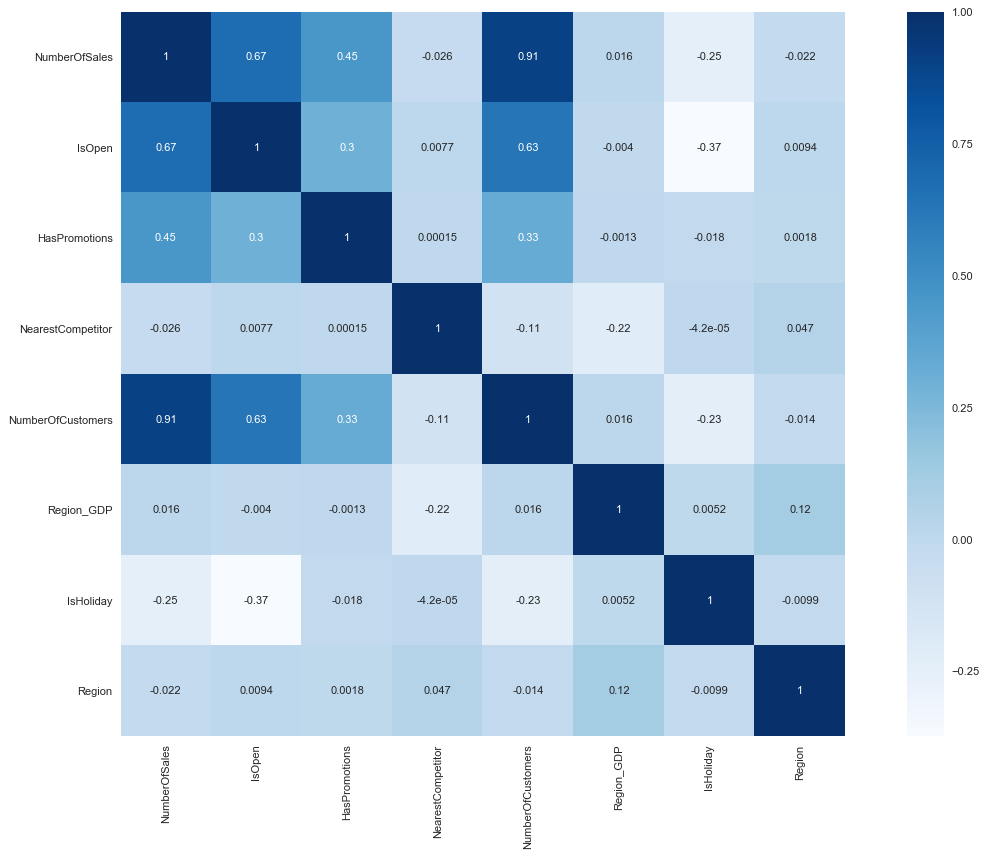

In [28]:
plt.rcParams['figure.figsize'] = [20.0,12.0]
plt.rcParams['figure.dpi']=80
covariance=dataset[['NumberOfSales','IsOpen','HasPromotions','NearestCompetitor','NumberOfCustomers','Region_GDP','IsHoliday','Region','Events']].corr(method='pearson')
sns.heatmap(covariance,square=True,annot=True,cmap="Blues")

In [29]:
sampleStore = dataset.loc[dataset['StoreID'] == 1000]

In [30]:
sampleStore['Date'] = pd.to_datetime(sampleStore['Date'],format='%d/%m/%Y')

In [31]:
s = sampleStore[:4]
s

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,2016-03-01,0,1,0,Hyper Market,General,326,7,495,...,1,11.0,16,-2,70,1029,1,6.0,0.0,23
1,1000,2016-03-02,0,1,0,Hyper Market,General,326,7,608,...,3,13.0,10,-2,58,1025,1,10.0,0.0,56
2,1000,2016-03-04,0,1,0,Hyper Market,General,326,7,665,...,3,11.0,10,-3,55,1023,2,8.0,0.0,22
3,1000,2016-03-05,0,1,0,Hyper Market,General,326,7,630,...,3,15.0,10,-6,25,1022,-1,10.0,0.0,108


TypeError: invalid type promotion

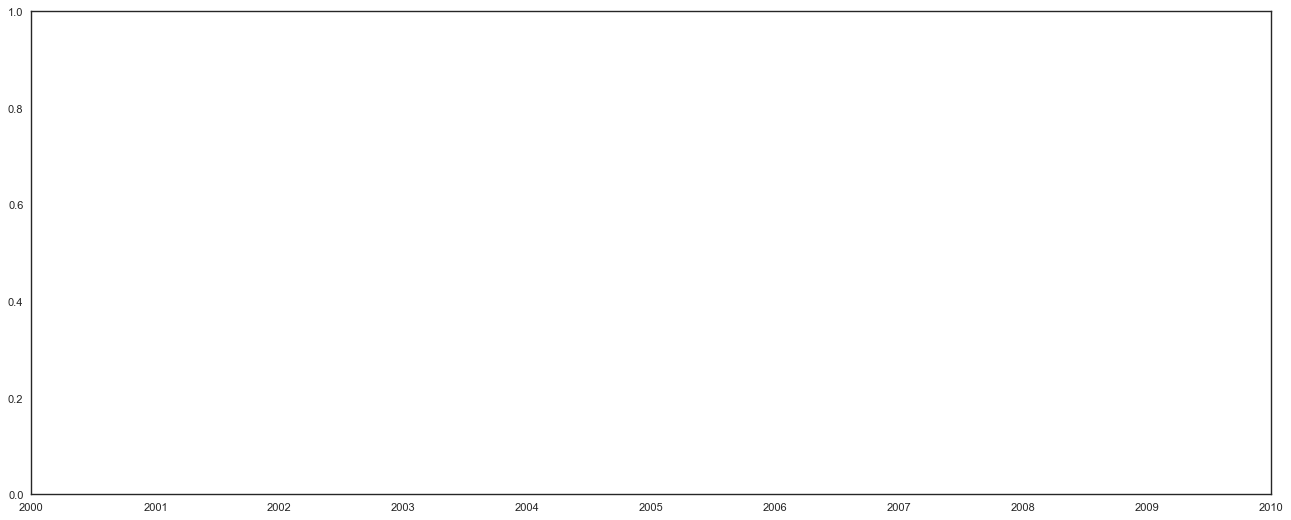

In [32]:
import datetime
import random
plt.rcParams['figure.figsize'] = [20.0,8.0]
plt.rcParams['figure.dpi']=80

# make up some data
x = sampleStore['Date']
y = sampleStore['NumberOfSales']

# plot
plt.scatter(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

In [ ]:
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()
ax.plot(sampleStore.Date, sampleStore.NumberOfSales)

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years...
#datemin = np.datetime64(r.date[0], 'Y')
#datemax = np.datetime64(r.date[-1], 'Y') + np.timedelta64(1, 'Y')
#ax.set_xlim(datemin, datemax)


# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
#ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()